## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Dataset Information

In [5]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
Attribute Information: (classes: edible=e, poisionous=p)
    
    •cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    •cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    •cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
    •bruises: bruises=t,no=f
    •odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
    •gill-attachment: attached=a,descending=d,free=f,notched=n
    •gill-spacing: close=c,crowded=w,distant=d
    •gill-size: broad=b,narrow=n
    •gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
    •stalk-shape: enlarging=e,tapering=t
    •stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
    •stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    •stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    •stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    •stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
    •veil-type: partial=p,universal=u
    •veil-color: brown=n,orange=o,white=w,yellow=y
    •ring-number: none=n,one=o,two=t
    •ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
    •spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
    •population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
    •habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [6]:
df.shape

(8124, 23)

In [47]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
for i in df.columns:
    print(i,df[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


## Data Vizualization

poisionous count: 3916 
edible count: 4208


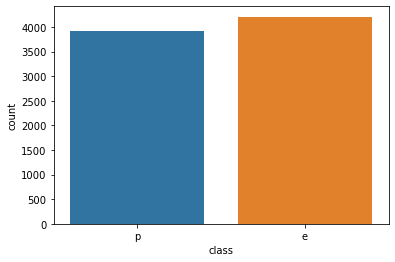

In [8]:
edible = df[df['class'] == 'e']['class'].count()
poisionous = df[df['class'] == 'p']['class'].count()
print("poisionous count: {} \nedible count: {}".format(poisionous,edible))
sns.countplot(df['class'])

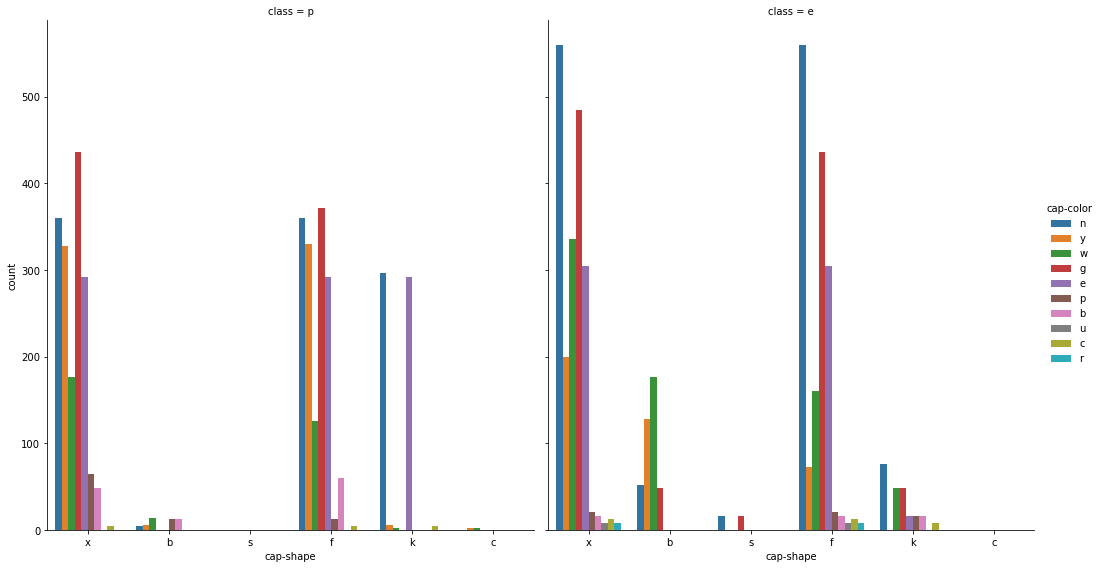

In [29]:
sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count",
                height=8, aspect=0.9)

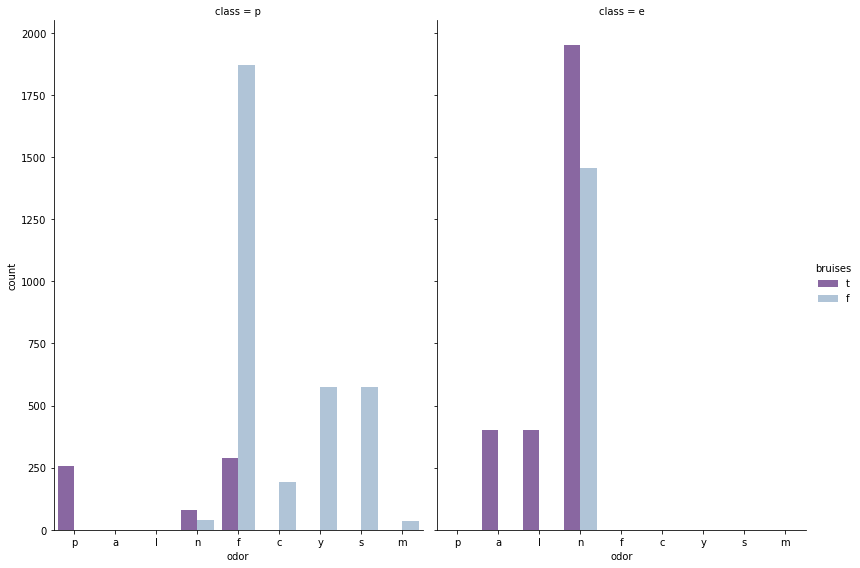

In [36]:
sns.catplot(x="odor", hue="bruises", col="class",
                data=df, kind="count",
                height=8, aspect=.7 , palette = 'BuPu_r');

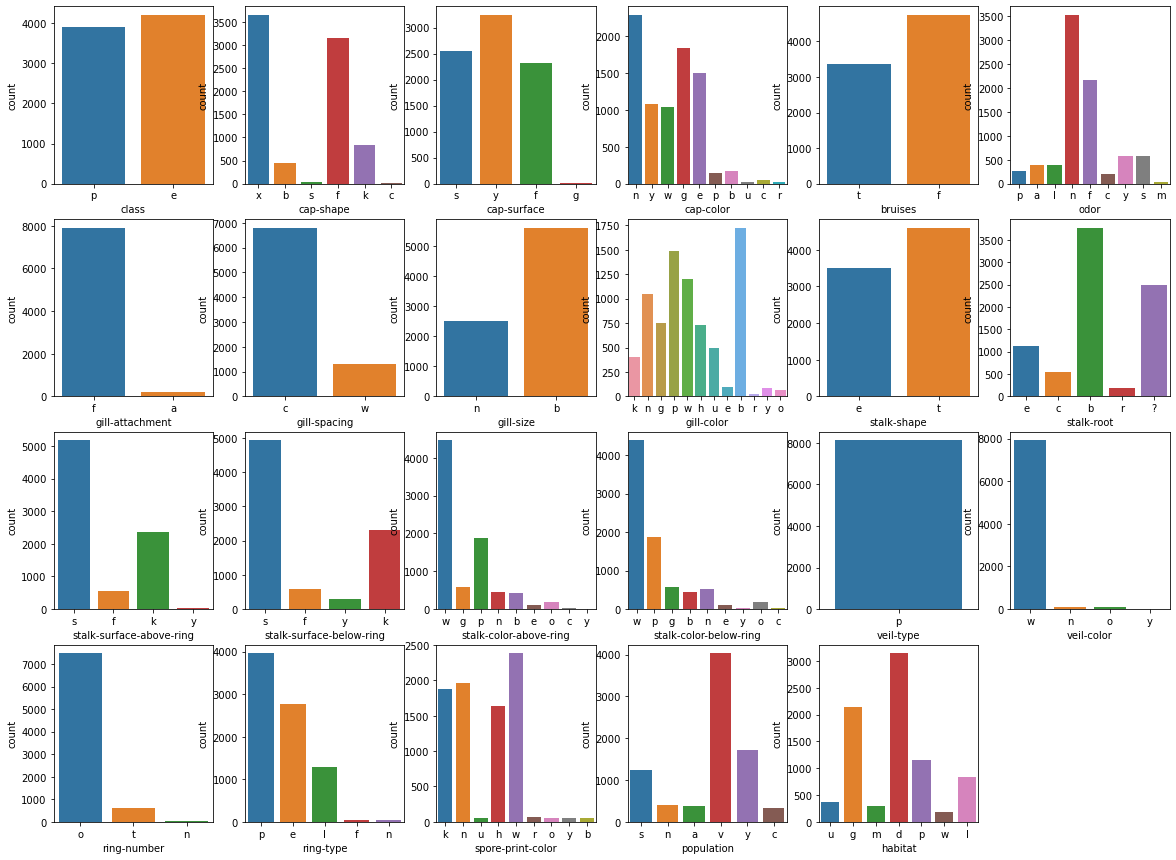

In [49]:
plt.figure(figsize=(20,15))
plotNum=1
for column in df:
    if plotNum<=23:
        ax=plt.subplot(4,6,plotNum)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotNum+=1
plt.show()

## Data Pre-processing

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


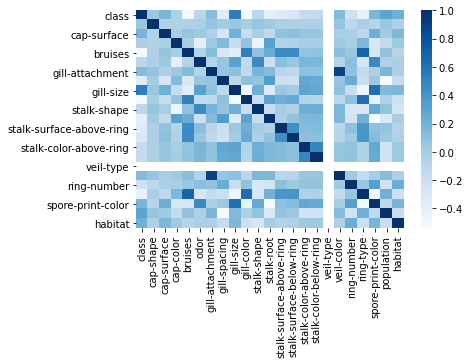

In [43]:
sns.heatmap(df.corr(),cmap='Blues')

## Selecting features with highest correlation

### Making list of correlation values

In [10]:
x = df.drop('class', axis=1)
y = df['class']
corr = []
for i in range(x.shape[1]):
    c = np.corrcoef(x.iloc[:,i],y)
    corr.append(abs(c[0][1]))

### Making DataFrame of correaltion values

In [11]:
corr_data = pd.DataFrame({'correlation': corr}, index=x.columns)

In [12]:
corr_data

,correlation
cap-shape,0.052951
cap-surface,0.178446
cap-color,0.031384
bruises,0.501530
odor,0.093552
gill-attachment,0.129200
gill-spacing,0.348387
gill-size,0.540024
gill-color,0.530566
stalk-shape,0.102019


### Graph for corr Dataframe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

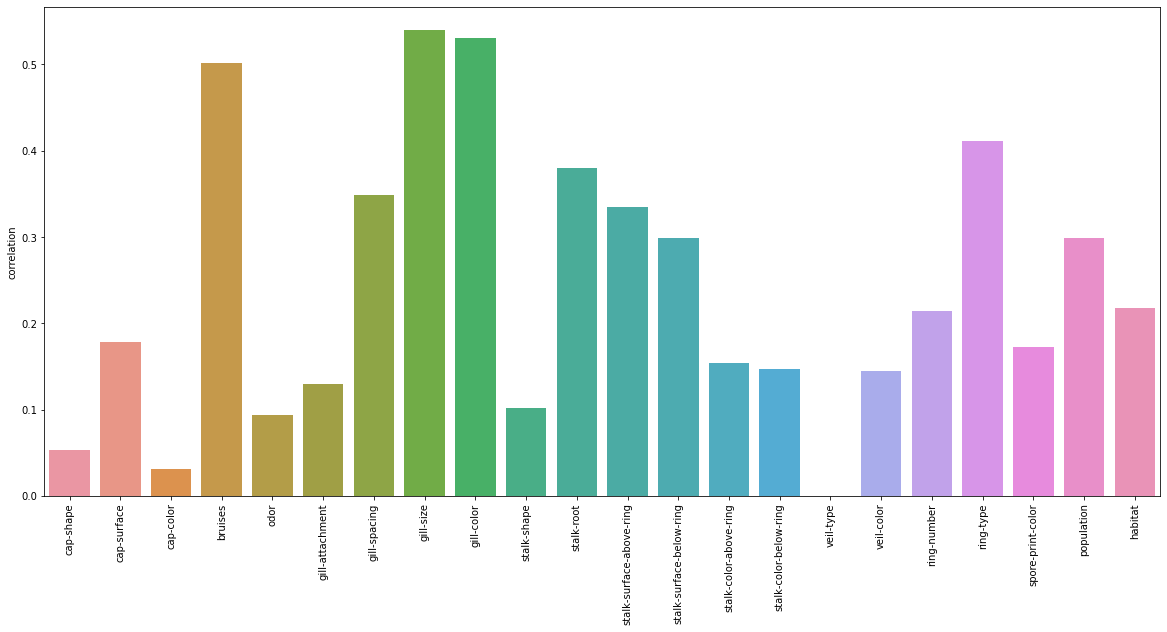

In [83]:
plt.figure(figsize=(20,9))
sns.barplot(x=corr_data.index, y = corr_data['correlation'])
plt.xticks(rotation=90)

### Features with correlation values greater than 0.2

In [14]:
corr_data = corr_data.sort_values(by = 'correlation', ascending=False)

In [15]:
corr_imp = corr_data[corr_data['correlation'] >= 0.2]

In [16]:
corr_imp

,correlation
gill-size,0.540024
gill-color,0.530566
bruises,0.501530
ring-type,0.411771
stalk-root,0.379361
gill-spacing,0.348387
stalk-surface-above-ring,0.334593
stalk-surface-below-ring,0.298801
population,0.298686
habitat,0.217179


In [17]:
corr_X = x[corr_imp.index]
corr_X.columns

Index(['gill-size', 'gill-color', 'bruises', 'ring-type', 'stalk-root',
       'gill-spacing', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'population', 'habitat', 'ring-number'],
      dtype='object')

## Test and train split

In [18]:
x_train , x_test , y_train , y_test = train_test_split(corr_X,y,test_size = 0.3, random_state = 0)

## Logistic Regression

In [21]:
accuracies = list()
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print("Mean-Squared-Error:", mean_squared_error(y_test,lr_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,lr_pred)*100,"%")
alt = ['Logistic Regression', accuracy_score(y_test,lr_pred), mean_squared_error(y_test,lr_pred)] 
accuracies.append(alt)

Mean-Squared-Error: 6.234618539786711 %
Accuracy: 93.76538146021329 %


## Support Vector Machine

In [22]:
svc_ = SVC()
svc_.fit(x_train,y_train)
svm_pred = svc_.predict(x_test)
print("Mean-Squared-Error:", mean_squared_error(y_test,svm_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,svm_pred)*100,"%")
alt2 = ['Support Vector Machine', accuracy_score(y_test,svm_pred), mean_squared_error(y_test,svm_pred)]
accuracies.append(alt2)

Mean-Squared-Error: 2.3789991796554553 %
Accuracy: 97.62100082034455 %


## Random Forest

In [23]:
rfc = RandomForestClassifier(max_depth = 5)
rfc.fit(x_train , y_train)
rfc_pred = rfc.predict(x_test)
print("Mean Square Error:", mean_squared_error(y_test,rfc_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,rfc_pred)*100,"%")
alt3 = ['Random Forest Classifier', accuracy_score(y_test,rfc_pred), mean_squared_error(y_test,rfc_pred)]
accuracies.append(alt3)

Mean Square Error: 1.1484823625922889 %
Accuracy: 98.85151763740771 %


### Result :-
### 1. Logistic Regression - 93.76%
### 2. Support Vector Machine - 97.62%
### 3. Random Forest Accuracy - 98.60%
### Hence, Ramdom Forest is comparitively better

In [24]:
accuracy_df  = pd.DataFrame(list(accuracies),columns = ['Model Name', 'Accuracy Score', 'Mean-Squared Error']) 
accuracy_df

,Model Name,Accuracy Score,Mean-Squared Error
0,Logistic Regression,0.937654,0.062346
1,Support Vector Machine,0.976210,0.023790
2,Random Forest Classifier,0.988515,0.011485


# Ensemble Model

## Max-Voting

In [43]:
model1 = LogisticRegression(max_iter=1000)
model2 = SVC(probability=True)
model3= RandomForestClassifier()
model = VotingClassifier(estimators=[('lr', model1), ('svc', model2), ('rfc',model3)])
model.fit(x_train,y_train)
ans = model.score(x_test,y_test)
print(ans*100,'%')

97.62100082034455 %


## Hyperparameter Tuning

In [44]:
params = {'voting': ['hard','soft'],
         'weights': [(1,1,1),(2,1,1),(1,2,1),(1,1,2)]
         }

In [45]:
grid = GridSearchCV(model,params)
grid.fit(x_train,y_train)
grid.best_params_

{'voting': 'soft', 'weights': (1, 1, 2)}

In [40]:
ans2 = grid.score(x_test,y_test)
print(ans2*100,'%')

100.0 %


### With hyperparameter tuning the result increased from 97.62% to 100%

### Finding the best set of parameters

In [41]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [113]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
data = pd.DataFrame(scores,columns=['model','best_score','best_params'])
data

,model,best_score,best_params
0,svm,1.000000,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,1.000000,{'n_estimators': 5}
2,logistic_regression,0.936511,{'C': 5}


## Bagging

In [31]:
from sklearn.ensemble import BaggingClassifier
Model = BaggingClassifier(
    base_estimator = RandomForestClassifier(max_depth=5),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0
)
Model.fit(x_train,y_train)
Model_pred= Model.predict(x_test)
print("Mean-Squared-Error:", mean_squared_error(y_test,Model_pred)*100,"%")
print("Accuracy:",accuracy_score(y_test,Model_pred)*100,"%")

Mean-Squared-Error: 1.3125512715340444 %
Accuracy: 98.68744872846595 %


## KFold cross validation

In [3]:
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [26]:
for train_index, test_index in kf.split(df):
    print(train_index, test_index)

[1625 1626 1627 ... 8121 8122 8123] [   0    1    2 ... 1622 1623 1624]
[   0    1    2 ... 8121 8122 8123] [1625 1626 1627 ... 3247 3248 3249]
[   0    1    2 ... 8121 8122 8123] [3250 3251 3252 ... 4872 4873 4874]
[   0    1    2 ... 8121 8122 8123] [4875 4876 4877 ... 6497 6498 6499]
[   0    1    2 ... 6497 6498 6499] [6500 6501 6502 ... 8121 8122 8123]


### Logistic regression model performance using cross_val_score

In [30]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x_train,y_train,cv=kf)

array([0.93760984, 0.93667546, 0.93755497, 0.93227792, 0.92875989])

In [46]:
score = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),x_train,y_train,cv=kf)
print("Average: ",np.average(score))

Average:  0.9345756183215782


### SVM model performance using cross_val_score

In [39]:
cross_val_score(SVC(gamma='auto'), x_train,y_train,cv=kf)

array([0.99297012, 0.99912049, 0.99384345, 0.99560246, 0.99384345])

In [40]:
score = cross_val_score(SVC(gamma='auto'), x_train,y_train,cv=kf)
print("Average: ",np.average(score))

Average:  0.9950759947013152


### random forest performance using cross_val_score

In [37]:
cross_val_score(RandomForestClassifier(n_estimators=50),x_train,y_train,cv=kf)

array([1., 1., 1., 1., 1.])

In [45]:
score = cross_val_score(RandomForestClassifier(n_estimators=50),x_train,y_train,cv=kf)
print("Average: ",np.average(score))

Average:  1.0


### Random forest classifier gives the best result